In [1]:
# montando el drive
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/PROYECTO-SIMULACION')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/PROYECTO-SIMULACION


In [2]:
# carga de librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# INTRODUCCION, PLANEAR EL PROBLEMA, BLABLABLA

In [3]:
dt = pd.read_csv("dataset/crops.csv")
dt.head()

,Crop,ScientificName,Symbol,NuContAvailable,PlantPartHarvested,CropCategory,YieldUnit,AvYieldUnitWeight(lb),AvMoisture%,AvN%(dry),AvP%(dry),AvK%(dry),YieldUnitWeight(lb)_set,YieldUnitWeight(lb)_Bau,YieldUnitWeight(lb)_Joh,YieldUnitWeight(lb)_Roberts,YieldUnitWeight(lb)_WEEP,YieldUnitWeight(lb)_Men,YieldUnitWeight(lb)_Guy,YieldUnitWeight(lb)_Mc,YieldUnitWeight(lb)_Mah,YieldUnitWeight(lb)_Sha,YieldUnitWeight(lb)_Sch,YieldUnitWeight(lb)_Atu,YieldUnitWeight(lb)_Zim,YieldUnitWeight(lb)_Scu,YieldUnitWeight(lb)_John,YieldUnitWeight(lb)_Arc,DryMatter%_M-FF,DryMatter%_NAS,DryMatter%_F&L,DryMatter%_F&N,DryMatter%_Alb,DryMatter%_Est1,DryMatter%_Est2,DryMatter%_Est3,DryMatter%_Est4,DryMatter%_Est5,DryMatter%_Est6,DryMatter%_M&R,...,K%(dry)_Col,K%(dry)_Alb,K%(dry)_Arc,K%(dry)_Swa,K%(dry)_Rei,Moisture%_M&R,Moisture%_M&L,Moisture%_Sun,Moisture%_Gro,gWater/100g_AgH8-9,gWater/100g_AgH8-12,gWater/100g_B788,Protein%(dry)_NAS,Protein%(dry)_F&L,Protein%(dry)_F&N,Protein%(dry)_Swa,Protein%(dry)_Chapko,Protein%(dry)_Hill,Protein%(dry)_Bru,Protein%(dry)_Bis,Protein%(dry)_Gar,Protein%(dry)_Heg,Protein%(dry)_Flo,Protein%(dry)_Feil,Protein%(dry)_Bre,Protein%(dry)_Burns,gProtein/100g(wet)_AgH8-9,gProtein/100g(wet)_AgH8-12,gProtein/100g(wet)_B788,Protein%(wet)_M&L,N%(wet)_M-FF,P%(wet)_M-FF,gP/100g(wet)_AgH8-9,gP/100g(wet)_AgH8-12,gP/100g(wet)_B788,P%(wet)_M&L,K%(wet)_M-FF,gK/100g(wet)_AgH8-9,gK/100g(wet)_AgH8-12,gK/100g(wet)_B788
0,Acorn,Quercus sp.,QUERC,"N,P,K",Fruit,Tree and fruit,lb of fruit,1.0,27.90,1.3647711512,0.10957004161,0.74757281553,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.15,NaN,NaN,NaN,NaN,NaN,0.079,NaN,NaN,NaN,NaN,0.539,NaN
1,"Alfalfa + Orchardgrass, for hay","Medicago sativa, Dactylis glomerata","MESA, DAGL","N,P",Aboveground biomass,Forage,ton,2000.0,9.70,2.4797142857,0.26785714286,#DIV/0!,"2,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.6,91.2,91.4,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.2,15.9,16.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Alfalfa + Orchardgrass, for hay (cut 1)","Medicago sativa, Dactylis glomerata","MESA, DAGL","N,P,K",Aboveground biomass,Forage,ton,2000.0,7.95,2.144,0.2,1.49,"2,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.9,91.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,16.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Alfalfa + Smooth Brome, for green chop","Medicago sativa, Bromus inermis","MESA, BRIN2","N,P,K",Aboveground biomass,Forage,ton,2000.0,77.63,3.3220740741,0.31055555556,2.8,"2,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.5,21.6,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.6,NaN,21.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77,0.07,NaN,NaN,NaN,NaN,0.63,NaN,NaN,NaN
4,"Alfalfa + Smooth Brome, for hay","Medicago sativa, Bromus inermis","MESA, BRIN2","N,P,K",Aboveground biomass,Forage,ton,2000.0,11.58,2.4177085202,0.27105381166,1.8977466368,"2,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.2,82.5,91.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.2,15.5,15.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.89,0.20,NaN,NaN,NaN,NaN,1.66,NaN,NaN,NaN


**Se dejan las columnas que contienen información pertinente para nuestro objetivo**

In [4]:
dt = pd.read_csv("dataset/crops.csv")
# df = df.drop(df.columns[[0, 1, 3]], axis=1)
# new_dataset = dataset[['A','D']]
dt = dt[['ScientificName', 
         'NuContAvailable', 
         'CropCategory', 
         'YieldUnit', 
         'AvYieldUnitWeight(lb)', 
         'AvMoisture%', 
         'AvN%(dry)', 
         'AvP%(dry)', 
         'AvK%(dry)', 
         'YieldUnitWeight(lb)_set',
         'DryMatter%_M-FF', 
         'DryMatter%_NAS', 
         'DryMatter%_F&L',
         'AvDryMatter%',]]
dt.head()

,ScientificName,NuContAvailable,CropCategory,YieldUnit,AvYieldUnitWeight(lb),AvMoisture%,AvN%(dry),AvP%(dry),AvK%(dry),YieldUnitWeight(lb)_set,DryMatter%_M-FF,DryMatter%_NAS,DryMatter%_F&L,AvDryMatter%
0,Quercus sp.,"N,P,K",Tree and fruit,lb of fruit,1.0,27.90,1.3647711512,0.10957004161,0.74757281553,1,NaN,NaN,NaN,72.10
1,"Medicago sativa, Dactylis glomerata","N,P",Forage,ton,2000.0,9.70,2.4797142857,0.26785714286,#DIV/0!,"2,000",89.6,91.2,91.4,90.30
2,"Medicago sativa, Dactylis glomerata","N,P,K",Forage,ton,2000.0,7.95,2.144,0.2,1.49,"2,000",NaN,92.9,91.2,92.05
3,"Medicago sativa, Bromus inermis","N,P,K",Forage,ton,2000.0,77.63,3.3220740741,0.31055555556,2.8,"2,000",22.5,21.6,NaN,22.37
4,"Medicago sativa, Bromus inermis","N,P,K",Forage,ton,2000.0,11.58,2.4177085202,0.27105381166,1.8977466368,"2,000",89.2,82.5,91.0,88.42


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ScientificName           737 non-null    object 
 1   NuContAvailable          737 non-null    object 
 2   CropCategory             737 non-null    object 
 3   YieldUnit                737 non-null    object 
 4   AvYieldUnitWeight(lb)    737 non-null    float64
 5   AvMoisture%              737 non-null    float64
 6   AvN%(dry)                737 non-null    object 
 7   AvP%(dry)                737 non-null    object 
 8   AvK%(dry)                737 non-null    object 
 9   YieldUnitWeight(lb)_set  711 non-null    object 
 10  DryMatter%_M-FF          201 non-null    float64
 11  DryMatter%_NAS           465 non-null    float64
 12  DryMatter%_F&L           320 non-null    float64
 13  AvDryMatter%             737 non-null    float64
dtypes: float64(6), object(8)
m

Revisamos si hay valores nulos en los datos

In [6]:
# mirando nulos por columna
print()
print(dt.isnull().sum())


ScientificName               0
NuContAvailable              0
CropCategory                 0
YieldUnit                    0
AvYieldUnitWeight(lb)        0
AvMoisture%                  0
AvN%(dry)                    0
AvP%(dry)                    0
AvK%(dry)                    0
YieldUnitWeight(lb)_set     26
DryMatter%_M-FF            536
DryMatter%_NAS             272
DryMatter%_F&L             417
AvDryMatter%                 0
dtype: int64


Para poder trabajar con el dataset necesitamos eliminar los registros con valores nulos

In [7]:
dt = dt.dropna()
print(dt.isnull().sum())

ScientificName             0
NuContAvailable            0
CropCategory               0
YieldUnit                  0
AvYieldUnitWeight(lb)      0
AvMoisture%                0
AvN%(dry)                  0
AvP%(dry)                  0
AvK%(dry)                  0
YieldUnitWeight(lb)_set    0
DryMatter%_M-FF            0
DryMatter%_NAS             0
DryMatter%_F&L             0
AvDryMatter%               0
dtype: int64


In [8]:
dt.head(10)

,ScientificName,NuContAvailable,CropCategory,YieldUnit,AvYieldUnitWeight(lb),AvMoisture%,AvN%(dry),AvP%(dry),AvK%(dry),YieldUnitWeight(lb)_set,DryMatter%_M-FF,DryMatter%_NAS,DryMatter%_F&L,AvDryMatter%
1,"Medicago sativa, Dactylis glomerata","N,P",Forage,ton,2000.0,9.70,2.4797142857,0.26785714286,#DIV/0!,"2,000",89.6,91.2,91.4,90.30
4,"Medicago sativa, Bromus inermis","N,P,K",Forage,ton,2000.0,11.58,2.4177085202,0.27105381166,1.8977466368,"2,000",89.2,82.5,91.0,88.42
7,"Medicago sativa, Phleum pratense","N,P,K",Forage,ton,2000.0,78.08,3.3647488584,0.36882420091,2.2393607306,"2,000",21.9,21.9,21.9,21.93
8,"Medicago sativa, Phleum pratense","N,P,K",Forage,ton,2000.0,10.37,2.1728869048,0.21107142857,2.16,"2,000",89.6,89.0,90.3,89.63
11,Medicago sativa,"N,P,K",Forage,ton,2000.0,76.50,3.2061967213,0.27897540984,2.6080327869,"2,000",24.4,25.9,23.7,23.50
12,Medicago sativa,"N,P,K",Forage,ton,2000.0,76.18,3.3517777778,0.29277777778,2.7177777778,"2,000",22.5,23.9,23.7,23.82
16,Medicago sativa,"N,P,K",Forage,ton,2000.0,75.05,2.7964192035,0.27073947715,2.8909782609,"2,000",25.3,24.7,27.9,24.95
20,Medicago sativa,"N,P,K",Forage,ton,2000.0,75.08,3.1585802372,0.29166996047,2.7134782609,"2,000",25.3,24.2,26.1,24.92
23,Medicago sativa,"N,P,K",Forage,ton,2000.0,78.34,3.4871175879,0.34391959799,2.2679522613,"2,000",19.9,20.9,22.5,21.66
27,Medicago sativa,"N,P,K",Forage,ton,2000.0,9.65,2.7887955801,0.26129834254,2.119198895,"2,000",90.5,91.4,89.5,90.35


In [9]:
# cambiamos los string por num para poder utilizarlo
print(dt.ScientificName.unique())
dt["ScientificName"] = dt["ScientificName"].replace(
    {'Medicago sativa, Dactylis glomerata':1,
    'Medicago sativa, Bromus inermis':2,
    'Medicago sativa, Phleum pratense':3,
    'Medicago sativa':4,
    'Hordeum vulgare':5,
    'Phaseolus vulgaris':6,
    'Phaseolus lunatus':7,
    'Cynodon dactylon':8,
    'Poa pratensis':9,
    'Andropogon sp.':10,
    'Bromus inermis':11,
    'Fagopyrum sp.':12,
    'Brassica oleracea':13,
    'Brassica sp.':14,
    'Daucus carota ssp. sativus':15,
    'Trifolium hybridum' :16,
    'Trifolium incarnatum' :17,
    'Trifolium pratense':18,
    'Trifolium repens' :19,
    'Trofolium repens' :20,
    'Zea mays ssp. mays':21,
    'Vigna unguiculata ssp. unguiculata' :22,
    'Pennisetum purpureum':23,
    'LInum usitatissimum' :24,
    'Poaceae' :25,
    'Setaria italica' :26,
    'Panicum miliaceum':27,
    'Avena sativa' :28,
    'Medicago Sativa, Dactylis glomerata' :29,
    'Dactylis glomerata':30,
    'Pisum sativum':31,
    'Arachis hypogaea' :32,
    'Solanum tuberosum' :33,
    'Cucurbita pepo':34,
    'Agrostis alba':35,
    'Oryza sativa':36,
    'Secale cereale':37,
    'Lolium perenne ssp. perenne':38,
    'Carthamus tinctorius':39,
    'Sesamum orientale':40,
    'Medicago Sativa, Bromus inermis':41,
    'Sorghum bicolor':42,
    'Glycine max':43,
    'Helianthus annuus':44,
    'Melilotus sp.':45,
    'Panicum virgatum':46,
    'Medicago Sativa, Phleum pratense':47,
    'Phleum pratense':48,
    'Solanum lycopersicum var. lycopersicum':49,
    'Brassica rapa var. rapa':50,
    'Vica sativa':51,
    'Triticum sp.':52,
    'Triticum aestivum':53,
    'Agropyron sp.':54,
    'Thinopyrum intermedium':55,
    'Elymus trachycaulus':56
    })



['Medicago sativa, Dactylis glomerata' 'Medicago sativa, Bromus inermis'
 'Medicago sativa, Phleum pratense' 'Medicago sativa' 'Hordeum vulgare'
 'Phaseolus vulgaris' 'Phaseolus lunatus' 'Cynodon dactylon'
 'Poa pratensis' 'Andropogon sp.' 'Bromus inermis' 'Fagopyrum sp.'
 'Brassica oleracea' 'Brassica sp.' 'Daucus carota ssp. sativus'
 'Trifolium hybridum' 'Trifolium incarnatum' 'Trifolium pratense'
 'Trifolium repens' 'Trofolium repens' 'Zea mays ssp. mays'
 'Vigna unguiculata ssp. unguiculata' 'Pennisetum purpureum'
 'LInum usitatissimum' 'Poaceae' 'Setaria italica' 'Panicum miliaceum'
 'Avena sativa' 'Medicago Sativa, Dactylis glomerata' 'Dactylis glomerata'
 'Pisum sativum' 'Arachis hypogaea' 'Solanum tuberosum' 'Cucurbita pepo'
 'Agrostis alba' 'Oryza sativa' 'Secale cereale'
 'Lolium perenne ssp. perenne' 'Carthamus tinctorius' 'Sesamum orientale'
 'Medicago Sativa, Bromus inermis' 'Sorghum bicolor' 'Glycine max'
 'Helianthus annuus' 'Melilotus sp.' 'Panicum virgatum'
 'Medicago

In [10]:
dt.head()

,ScientificName,NuContAvailable,CropCategory,YieldUnit,AvYieldUnitWeight(lb),AvMoisture%,AvN%(dry),AvP%(dry),AvK%(dry),YieldUnitWeight(lb)_set,DryMatter%_M-FF,DryMatter%_NAS,DryMatter%_F&L,AvDryMatter%
1,1,"N,P",Forage,ton,2000.0,9.70,2.4797142857,0.26785714286,#DIV/0!,"2,000",89.6,91.2,91.4,90.30
4,2,"N,P,K",Forage,ton,2000.0,11.58,2.4177085202,0.27105381166,1.8977466368,"2,000",89.2,82.5,91.0,88.42
7,3,"N,P,K",Forage,ton,2000.0,78.08,3.3647488584,0.36882420091,2.2393607306,"2,000",21.9,21.9,21.9,21.93
8,3,"N,P,K",Forage,ton,2000.0,10.37,2.1728869048,0.21107142857,2.16,"2,000",89.6,89.0,90.3,89.63
11,4,"N,P,K",Forage,ton,2000.0,76.50,3.2061967213,0.27897540984,2.6080327869,"2,000",24.4,25.9,23.7,23.50


In [11]:
print(dt["CropCategory"].unique())

dt["CropCategory"] = dt["CropCategory"].replace({
    'Forage':1,
    'Cereal and oil':2,
    'Vegetable':3,
    'Fiber and miscellaneous':4
})
dt.head()

['Forage' 'Cereal and oil' 'Vegetable' 'Fiber and miscellaneous']


,ScientificName,NuContAvailable,CropCategory,YieldUnit,AvYieldUnitWeight(lb),AvMoisture%,AvN%(dry),AvP%(dry),AvK%(dry),YieldUnitWeight(lb)_set,DryMatter%_M-FF,DryMatter%_NAS,DryMatter%_F&L,AvDryMatter%
1,1,"N,P",1,ton,2000.0,9.70,2.4797142857,0.26785714286,#DIV/0!,"2,000",89.6,91.2,91.4,90.30
4,2,"N,P,K",1,ton,2000.0,11.58,2.4177085202,0.27105381166,1.8977466368,"2,000",89.2,82.5,91.0,88.42
7,3,"N,P,K",1,ton,2000.0,78.08,3.3647488584,0.36882420091,2.2393607306,"2,000",21.9,21.9,21.9,21.93
8,3,"N,P,K",1,ton,2000.0,10.37,2.1728869048,0.21107142857,2.16,"2,000",89.6,89.0,90.3,89.63
11,4,"N,P,K",1,ton,2000.0,76.50,3.2061967213,0.27897540984,2.6080327869,"2,000",24.4,25.9,23.7,23.50


In [12]:
print(dt["NuContAvailable"].unique())
dt["NuContAvailable"] = dt["NuContAvailable"].replace({
    'N,P':1,
    'N,P,K':2,
    'N,K':3,
    'N':4
})

['N,P' 'N,P,K' 'N,K' 'N']


In [13]:
dt.head()

,ScientificName,NuContAvailable,CropCategory,YieldUnit,AvYieldUnitWeight(lb),AvMoisture%,AvN%(dry),AvP%(dry),AvK%(dry),YieldUnitWeight(lb)_set,DryMatter%_M-FF,DryMatter%_NAS,DryMatter%_F&L,AvDryMatter%
1,1,1,1,ton,2000.0,9.70,2.4797142857,0.26785714286,#DIV/0!,"2,000",89.6,91.2,91.4,90.30
4,2,2,1,ton,2000.0,11.58,2.4177085202,0.27105381166,1.8977466368,"2,000",89.2,82.5,91.0,88.42
7,3,2,1,ton,2000.0,78.08,3.3647488584,0.36882420091,2.2393607306,"2,000",21.9,21.9,21.9,21.93
8,3,2,1,ton,2000.0,10.37,2.1728869048,0.21107142857,2.16,"2,000",89.6,89.0,90.3,89.63
11,4,2,1,ton,2000.0,76.50,3.2061967213,0.27897540984,2.6080327869,"2,000",24.4,25.9,23.7,23.50


In [14]:
print(dt["YieldUnit"].unique())

dt["YieldUnit"] = dt["YieldUnit"].replace({'lb of fruit ':'lb of fruit'})

dt["YieldUnit"] = dt["YieldUnit"].replace({
    'ton':1,
    'bu':2,
    'cwt':3,
    'lb of leaf':4,
    'lb of root':5,
    'lb of seed':6,
    'lb of fruit':7,
    'lb straw/bu grain':8
})

dt.head()

['ton' 'bu' 'cwt' 'lb of leaf' 'lb of root' 'lb of seed' 'lb of fruit'
 'lb of fruit ' 'lb straw/bu grain']


,ScientificName,NuContAvailable,CropCategory,YieldUnit,AvYieldUnitWeight(lb),AvMoisture%,AvN%(dry),AvP%(dry),AvK%(dry),YieldUnitWeight(lb)_set,DryMatter%_M-FF,DryMatter%_NAS,DryMatter%_F&L,AvDryMatter%
1,1,1,1,1,2000.0,9.70,2.4797142857,0.26785714286,#DIV/0!,"2,000",89.6,91.2,91.4,90.30
4,2,2,1,1,2000.0,11.58,2.4177085202,0.27105381166,1.8977466368,"2,000",89.2,82.5,91.0,88.42
7,3,2,1,1,2000.0,78.08,3.3647488584,0.36882420091,2.2393607306,"2,000",21.9,21.9,21.9,21.93
8,3,2,1,1,2000.0,10.37,2.1728869048,0.21107142857,2.16,"2,000",89.6,89.0,90.3,89.63
11,4,2,1,1,2000.0,76.50,3.2061967213,0.27897540984,2.6080327869,"2,000",24.4,25.9,23.7,23.50


129


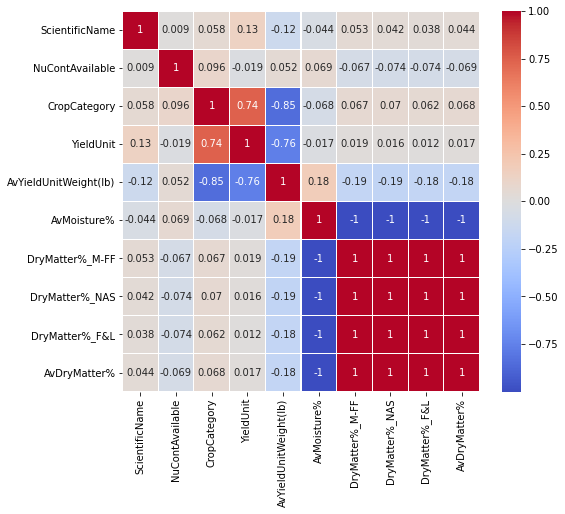

In [23]:
#matriz de correlacion
plt.figure(figsize=(8,7))
sns.heatmap(data = dt.corr(), annot=True, linewidths=.1, cmap='coolwarm')